In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Given Dataset
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

In [3]:
# Sigmod Function
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

# Loss Function
def get_loss(y, yhat):
    loss = -np.mean(y*(np.log(yhat)) - (1 - y) * np.log(1 - yhat))
    return loss

In [4]:
# Estimating logistic regression coefficients using stochastic gradient descent
def train(X, y, epochs, lr): 
    m, n = X.shape
    # Reshaping y
    y = y.reshape(m, 1)
    
    # Initializing weights and bias to zeros
    w = np.zeros((n, 1))
    b = 0
    
    min_loss = 0
    res_w = w
    res_b = b
        
    # Training loop
    for _ in range(epochs):
        xb = X
        yb = y

        # Calculating prediction
        yhat = sigmoid(np.dot(xb, w) + b)

        # Getting the gradients of loss w.r.t parameters
        dw = (1 / m) * np.dot(xb.T, (yhat - yb))
        db = (1 / m) * np.sum((yhat - yb)) 

        # Updating the weights and bias
        w -= lr * dw
        b -= lr * db
        
        # Calculating loss and appending it in the list
        l = get_loss(y, sigmoid(np.dot(X, w) + b))
        
        # taking the minimum loss
        if l < min_loss:
            res_w = w
            res_b = b
            min_loss = l
        
    # returning weights, bias and losses
    return res_w, res_b, min_loss

In [5]:
# Plotting linear decision boundary
def plot_decision_boundary(X, w, b):
    # y = mx + c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0] / w[1]
    c = -b / w[1]
    x2 = m * x1 + c
    
    # Visualize dataset 
    plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

[[ 1.50126429]
 [-1.47891617]] -0.25541236586485805


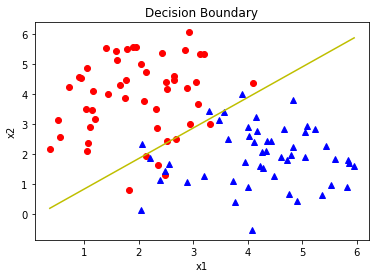

In [6]:
alpha = 0.01 # learning rate
num_epoch = 2000

# Training phase 
w, b, loss = train(X, y, epochs=num_epoch, lr=alpha)

# Plotting Decision Boundary
print(w, b)
plot_decision_boundary(X, w, b)